In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
print(df.shape)
print(df.columns)
print(df.head())


(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0        

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [ ]:
print(df.isnull().sum())


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Label encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.866


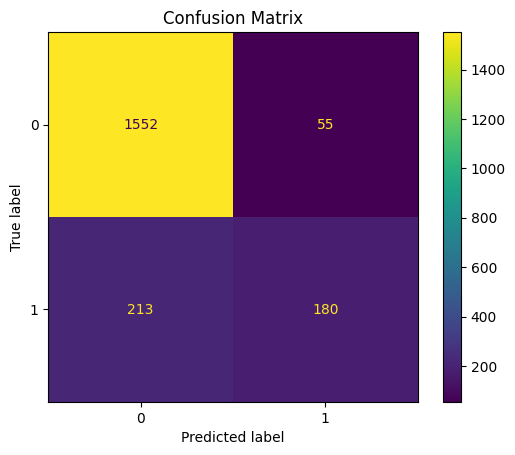

In [ ]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()


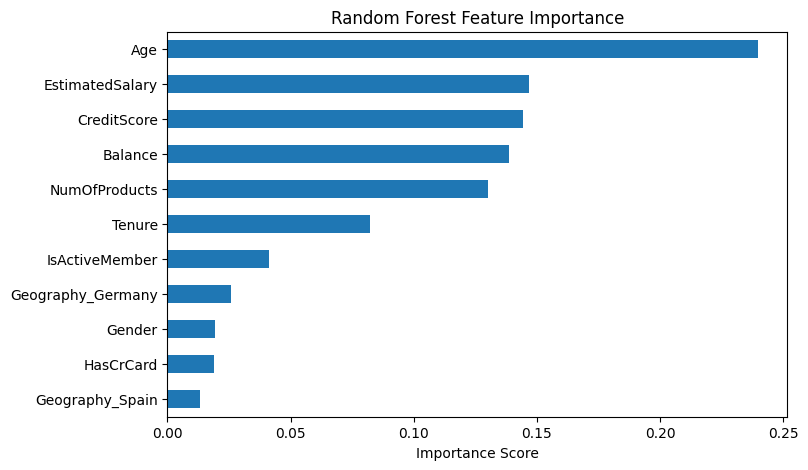

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.show()


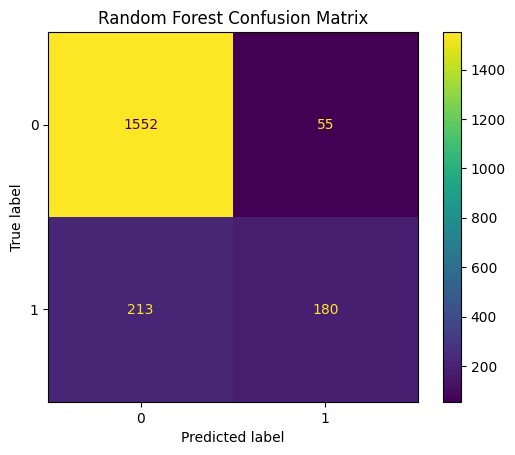

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Original class distribution:", y_train.value_counts().to_dict())
print("Resampled class distribution:", pd.Series(y_res).value_counts().to_dict())


Original class distribution: {0: 6356, 1: 1644}
Resampled class distribution: {0: 6356, 1: 6356}


In [ ]:
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)


In [ ]:
rf_wt = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_wt.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Random Forest (with class weights) Accuracy: 0.866


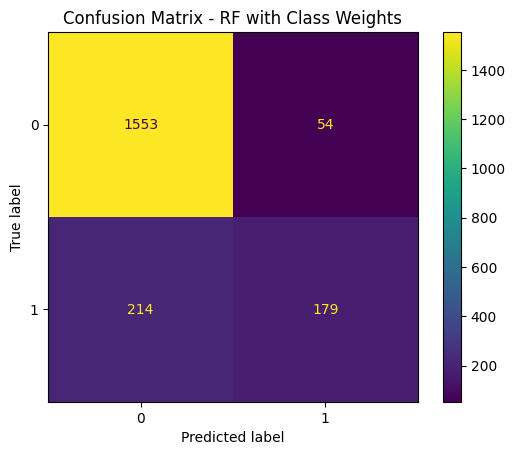

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
# Predict
y_pred_wt = rf_wt.predict(X_test)

# Accuracy
acc_wt = accuracy_score(y_test, y_pred_wt)
print("Random Forest (with class weights) Accuracy:", acc_wt)

# Confusion matrix
cm_wt = confusion_matrix(y_test, y_pred_wt)
ConfusionMatrixDisplay(cm_wt).plot()
plt.title('Confusion Matrix - RF with Class Weights')
plt.show()

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_wt))
